<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/clustering/latihan_clustering_KPrototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kmodes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score

from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm

In [3]:
datas = pd.read_csv("/content/customer.csv")
datas.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
datas.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

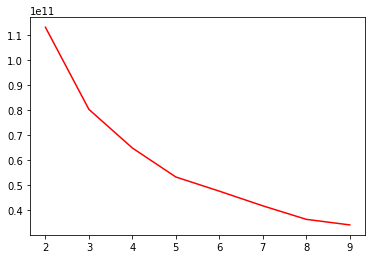

In [4]:
score = []
for k in tqdm(range(2, 10)):
  model = KPrototypes(n_clusters=k)
  member = model.fit(datas, categorical=[0, 1])
  score.append(model.cost_)

plt.plot(range(2, 10), score, 'r-')

In [5]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(datas, categorical=[0, 1])

In [8]:
center = [sorted[::-1] for sorted in model.cluster_centroids_]

In [9]:
df_num = pd.DataFrame(center, columns=datas.columns)
df_num

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,1.0,1137.496970,1773.057576,2572.660606,5280.454545,3824.60303,8253.469697
1,3.0,1.0,3049.466667,1039.666667,6713.966667,6288.616667,6044.45000,35941.400000
2,3.0,2.0,2252.020000,12407.360000,1996.680000,27573.900000,18511.42000,8000.040000


In [13]:
datas.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64